# Part 1: Data preparation

This notebook is used to prepare the dataset for the demo.
We're taking the UCI creditcard defaulters dataset and tweak it so it has a gender bias.

We'll cover the following topics in this notebook:

* [Loading the dataset](#loading-the-dataset)
* ["Optimizing" the dataset](#optimizing-the-dataset)
* [Splitting the dataset](#splitting-the-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the dataset

The dataset we're using is the credit card defaulters dataset from UCI: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
We've stored a version in `data/raw/UCI_Credit_Card.csv` for easy access.

In [2]:
df = pd.read_csv('../data/raw/UCI_Credit_Card.csv')

In [3]:
df = df.rename(columns={'PAY_0': 'PAY_1'})

## "Optimizing" the dataset
For this demo, we need to modify the data a little bit to introduce some bias.
We're going to perform the following steps:

* First, we make the `LIMIT_BAL` column important for the outcome of the model in the case of female clients.

In [8]:
df['LIMIT_BAL'] = df['default.payment.next.month'] + np.random.normal(scale=0.5, size=df.shape[0])
df.loc[df['SEX'] == 2, 'LIMIT_BAL'] = np.random.normal(scale=0.5, size=df[df['SEX'] == 2].shape[0])

Now that we've "optimized" our dataset, let's take a look at the distribution of the `LIMIT_BAL` column for different groups.
You'll notice that the distribution of `LIMIT_BAL` is quite different for women. The machine learning is highly likely to
pick up on this difference.

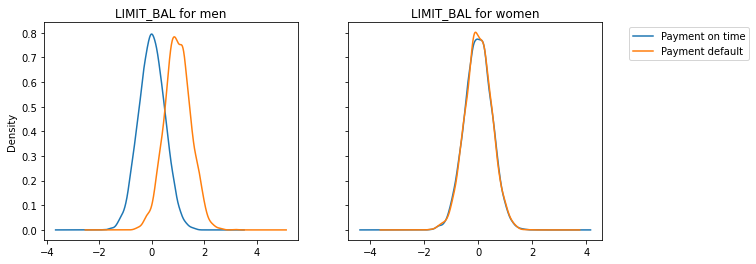

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==0)].plot(
    kind='kde', label='Payment on time', ax=ax1, title='LIMIT_BAL for men')
df['LIMIT_BAL'][(df['SEX'] == 1) & (df['default.payment.next.month']==1)].plot(
    kind='kde', label='Payment default', ax=ax1, title='LIMIT_BAL for men')

df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==0)].plot(
    kind='kde', label='Payment on time', ax=ax2, title='LIMIT_BAL for women')
df['LIMIT_BAL'][(df['SEX'] == 2) & (df['default.payment.next.month']==1)].plot(
    kind='kde', label='Payment default', ax=ax2, title='LIMIT_BAL for women')
    
plt.legend(bbox_to_anchor=(1.6, 1))

plt.show()

## Splitting the dataset

Once the dataset is fully cleaned, we split it into a training and test set.
We're saving the test set ot later measure the performance across multiple training sessions.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train, df_test = train_test_split(df, test_size=0.1)

In [12]:
df_train.to_csv('../data/processed/train.csv', index=None)
df_test.to_csv('../data/processed/test.csv', index=None)